In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from __future__ import print_function
import numpy as np
from orphics import lensing,io,stats,cosmology,maps

Generating theory Cls...
Loaded cached Cls from  output/clsAll_3000_20180118.pkl
Loaded cached Cls from  output/clphi_3000_20180118.txt


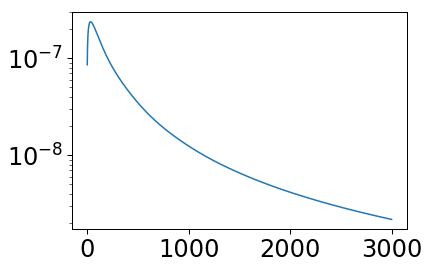

In [14]:
lmax = 3000
cc = cosmology.Cosmology(lmax=lmax,pickling=True,dimensionless=True)
theory = cc.theory
ells = np.arange(2,lmax,1)
clkk = theory.gCl('kk',ells)

pl = io.Plotter(yscale='log')
pl.add(ells,clkk)
pl.done()

In [18]:
shape,wcs = maps.rect_geometry(width_deg = 5.,px_res_arcmin=1.5)
bin_edges = np.arange(80,2100,20)
nlgen = lensing.NlGenerator(shape,wcs,theory,bin_edges,lensedEqualsUnlensed=True)
beam = 7.0
noiseT = 33.
noiseP = 56.
tellmin = 2
tellmax = 3000
pellmin = 2
pellmax = 3000
kmin = 80
kmax = 2000
polCombs = ['TT','TE','EE','EB','TB']
_,_,_,_ = nlgen.updateNoise(beamX=beam,noiseTX=noiseT,noisePX=noiseP,tellminX=tellmin,tellmaxX=tellmax,pellminX=pellmin,pellmaxX=pellmax)
ls,nls,bells,nlbb,efficiency = nlgen.getNlIterative(polCombs,kmin,kmax,tellmax,pellmin,pellmax,verbose=True,plot=False)


Performing iteration  1
Performing iteration  2
Percentage difference between iterations is  0.00123894050266  compared to requested tolerance of  1.0 . Diff of Nlkks is  0.307984975482


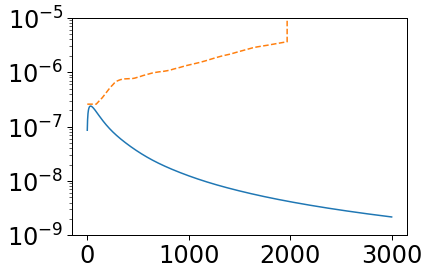

In [19]:

pl = io.Plotter(yscale='log')
pl.add(ells,clkk)
pl.add(ls,nls,ls='--')
pl._ax.set_ylim(1.e-9,1.e-5)
pl.done()